In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "InvoiceNo": [536365, 536366, 536367, 536368, 536369, 536370, 536371, 536372, 536373, 536374],
    "StockCode": ["71053", "85123A", "71056", "22929", "85099B", "79323P", "22083", "23203", "22941", "21754"],
    "Description": ["White Mug", "Blue Notebook", "Red Cushion", "Candle Holder", "Jumbo Pencil",
                    "Wooden Frame", "Silver Necklace", "Glass Vase", "Leather Wallet", "Handmade Bowl"],
    "Quantity": [6, 12, 10, 8, 20, 5, 3, 2, 1, 4],
    "InvoiceDate": ["2023-01-01 08:45:00", "2023-01-01 09:30:00", "2023-01-02 10:15:00",
                    "2023-01-03 11:20:00", "2023-01-03 12:05:00", "2023-01-04 13:10:00",
                    "2023-01-05 14:25:00", "2023-01-06 15:40:00", "2023-01-07 16:55:00",
                    "2023-01-08 18:05:00"],
    "UnitPrice": [2.50, 1.99, 4.50, 3.99, 0.85, 7.50, 15.99, 9.99, 25.50, 12.75],
    "CustomerID": [17850, 17851, 17852, 17853, 17854, 17855, 17856, 17857, 17858, 17859],
    "Country": ["United Kingdom", "Denmark", "France", "Germany", "United Kingdom",
                "Denmark", "Italy", "United Kingdom", "Spain", "Denmark"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV file
df.to_csv("online_retail.csv", index=False)

print("Dataset Created and Saved as 'online_retail.csv' \n")

df = pd.read_csv("online_retail.csv")



Dataset Created and Saved as 'online_retail.csv' 



In [2]:
# Print the number of rows and columns
print("\n Number of Rows and Columns:", df.shape)



 Number of Rows and Columns: (10, 8)


In [6]:
#  Print the column names
print("\n Column Names:", df.columns.tolist())


 Column Names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [7]:
#  Print the data types
print("\n Data Types:\n", df.dtypes)


 Data Types:
 InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object


In [8]:
#  Print InvoiceNo and count of products per invoice
print("\n Count of Products per Invoice:")
print(df.groupby("InvoiceNo")["StockCode"].count())



 Count of Products per Invoice:
InvoiceNo
536365    1
536366    1
536367    1
536368    1
536369    1
536370    1
536371    1
536372    1
536373    1
536374    1
Name: StockCode, dtype: int64


In [9]:

#  Print CustomerID and average UnitPrice
print("\n Average UnitPrice per CustomerID:")
print(df.groupby("CustomerID")["UnitPrice"].mean())



 Average UnitPrice per CustomerID:
CustomerID
17850     2.50
17851     1.99
17852     4.50
17853     3.99
17854     0.85
17855     7.50
17856    15.99
17857     9.99
17858    25.50
17859    12.75
Name: UnitPrice, dtype: float64


In [10]:
#  Print Description and InvoiceDate of products sold in UK or Denmark
print("\n Products sold in UK or Denmark:")
print(df[df["Country"].isin(["United Kingdom", "Denmark"])][["Description", "InvoiceDate"]])


 Products sold in UK or Denmark:
     Description          InvoiceDate
0      White Mug  2023-01-01 08:45:00
1  Blue Notebook  2023-01-01 09:30:00
4   Jumbo Pencil  2023-01-03 12:05:00
5   Wooden Frame  2023-01-04 13:10:00
7     Glass Vase  2023-01-06 15:40:00
9  Handmade Bowl  2023-01-08 18:05:00


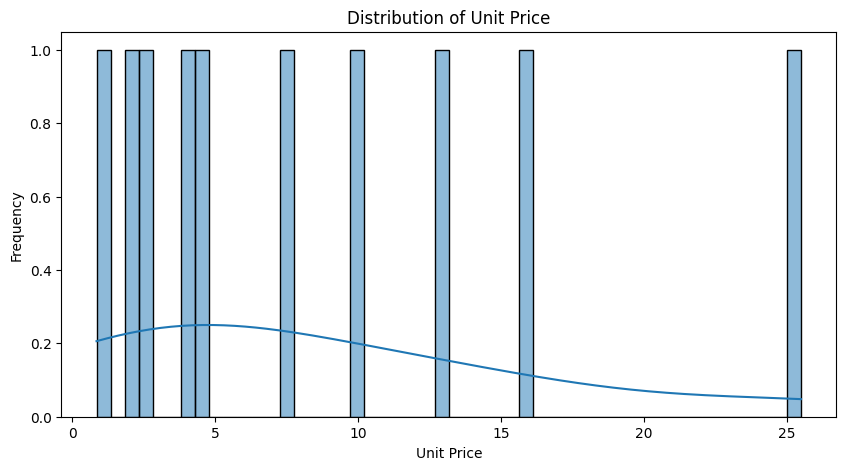

In [11]:
#  Perform univariate analysis on UnitPrice
plt.figure(figsize=(10,5))
sns.histplot(df["UnitPrice"], bins=50, kde=True)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


In [12]:
#  Calculate outliers for UnitPrice
Q1 = df["UnitPrice"].quantile(0.25)
Q3 = df["UnitPrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("\n Outlier Thresholds for UnitPrice:")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


 Outlier Thresholds for UnitPrice:
Lower Bound: -10.90875, Upper Bound: 25.841250000000002


In [13]:
#  Print records of outlier products based on UnitPrice
outliers = df[(df["UnitPrice"] < lower_bound) | (df["UnitPrice"] > upper_bound)]
print("\n Outlier Products based on UnitPrice:")
print(outliers)


 Outlier Products based on UnitPrice:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


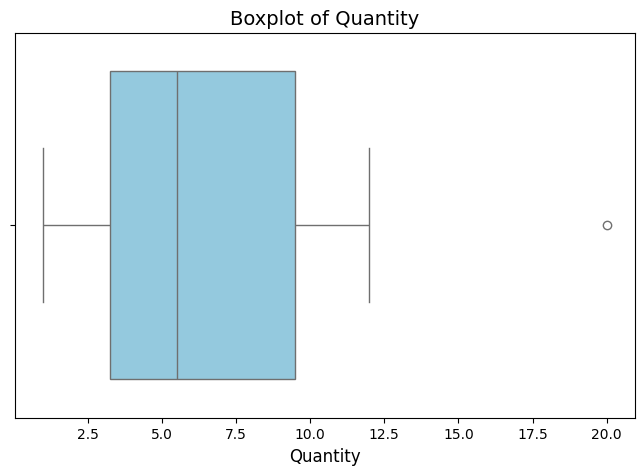

In [14]:
# Set the style
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Quantity"], color="skyblue")

# Add title and labels
plt.title("Boxplot of Quantity", fontsize=14)
plt.xlabel("Quantity", fontsize=12)

# Show the plot
plt.show()